# __Assignment-1 Answers__

Importing the libraries

In [1]:
import numpy as np
import scipy as sp
import math as m
from prettytable import PrettyTable
from Library_asgn1 import *

### Q1

In [2]:
# Defining the function
def f1(x):
    return (np.exp(-x))-x
def g1(x):
    return np.exp(-x)

# Calling the Fixed Point Iteration Method
q1=Solve_Non_Linear_Equation_1D(g1,None,None,None,.000001)
guess=0
root,steps= q1.fixed_point(guess)

# Displaying the result
print("The root of the equation is: ", round(root,4))
print("The number of steps are: ", steps)

The root of the equation is:  0.5671
The number of steps are:  26


### Q2


In [3]:
# Defining the function
def f2(x):
    return np.sqrt(1+(x**4))

# Defining the limits and Number of subintervals
a_q2 = 0
b_q2 = 1
N= 100

# Calculating the integral using Newton-Cotes Quadrature
p2_1=Newton_Cotes(f2,a_q2,b_q2,N)
I_mid=p2_1.midpoint()
I_trap=p2_1.trapezoidal()
I_simp=p2_1.simpsons()

## Calculating the integral using Gaussian Quadrature
degree = 3
p2_2 = Gaussian_Quadrature(f2,a_q2,b_q2,degree)
I_gauss=p2_2.integrate()

# Displaying the result
I_list=[I_simp,I_mid,I_trap,I_gauss]
M_list=["Simpson's Rule","Midpoint Rule","Trapezoidal Rule","Gaussian Quadrature"]

# Create a new table
table_qn2 = PrettyTable()
table_qn2.field_names = ["Method","Integral (I)"]
for i in range(len(I_list)):
    table_qn2.add_row([M_list[i],round(I_list[i],6)])
print(table_qn2)

+---------------------+--------------+
|        Method       | Integral (I) |
+---------------------+--------------+
|    Simpson's Rule   |   1.089429   |
|    Midpoint Rule    |   1.089424   |
|   Trapezoidal Rule  |   1.089441   |
| Gaussian Quadrature |   1.089459   |
+---------------------+--------------+


### Q3

The items in the tables are coordinates (x,y) for each h value. The first value is x and the second value is y.
The complete table is too large to display. Here are the first 5 rows:
+---------------+---------------+----------------+----------------+
|     h=0.5     |     h=0.2     |     h=0.05     |     h=0.01     |
+---------------+---------------+----------------+----------------+
|     (0,1)     |     (0,1)     |     (0,1)      |     (0,1)      |
| (0.5,0.91319) |  (0.2,0.9378) | (0.05,0.98213) | (0.01,0.99634) |
| (1.0,1.07193) | (0.4,0.91044) | (0.1,0.96558)  | (0.02,0.99272) |
| (1.5,1.34978) | (0.6,0.92671) | (0.15,0.9507)  | (0.03,0.98914) |
| (2.0,1.61913) | (0.8,0.98381) |  (0.2,0.9378)  | (0.04,0.98561) |
+---------------+---------------+----------------+----------------+


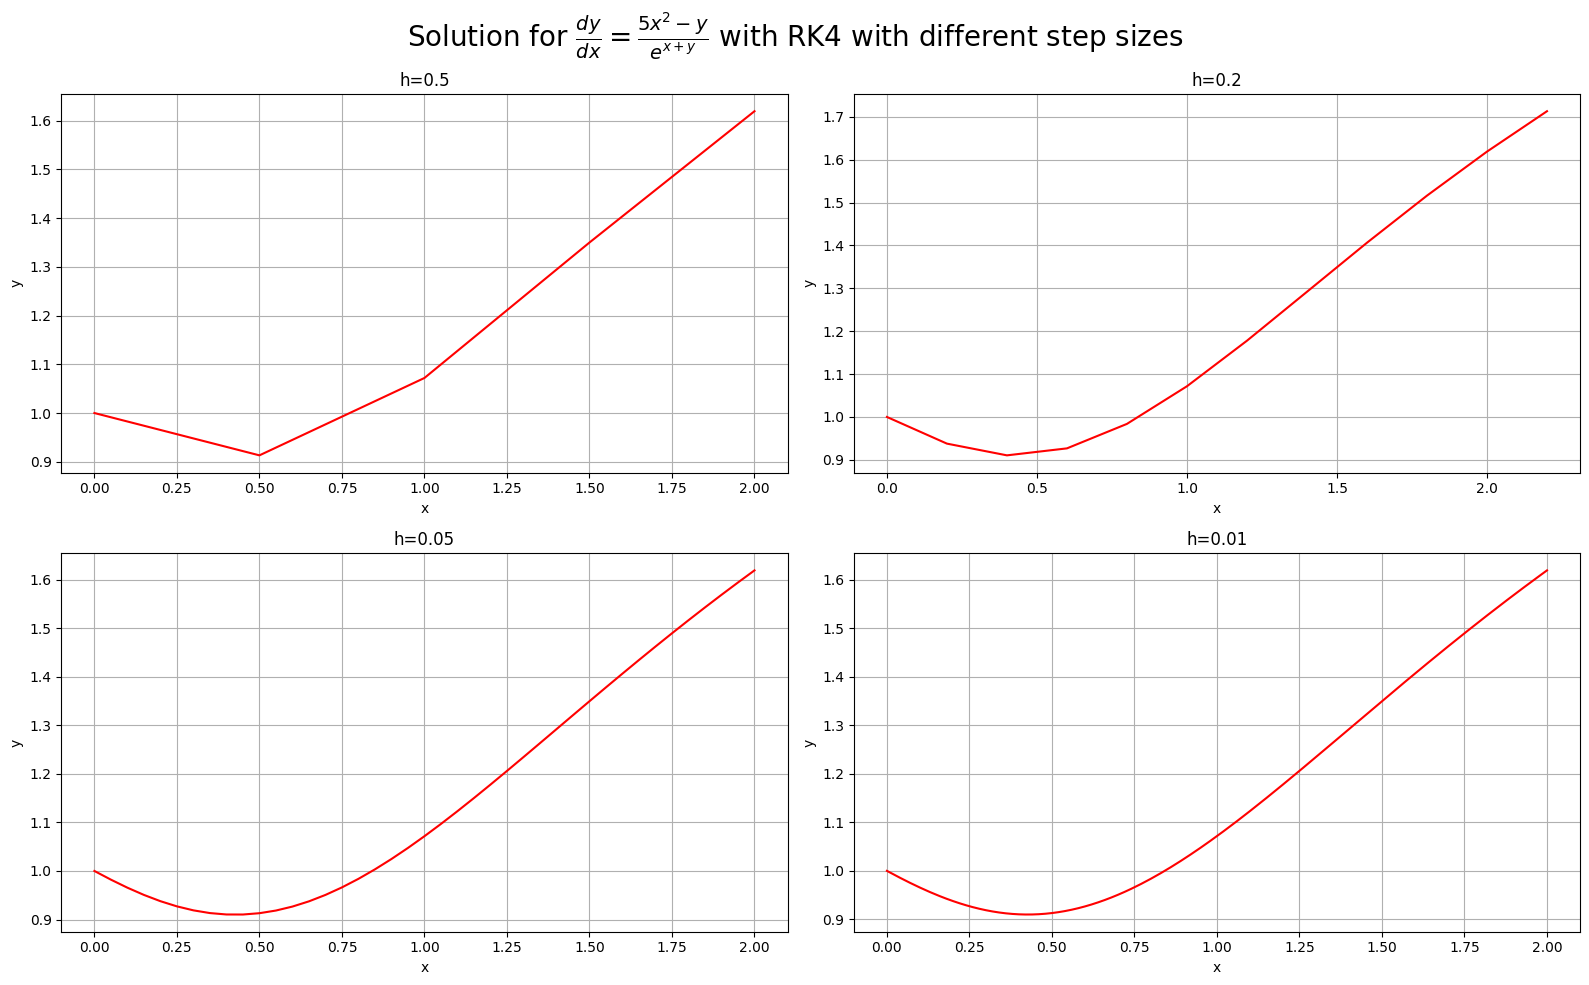

In [4]:
# Defining dy/dx=f(x,y)=(5x^2-y)/(e^(x+y))
def f3(x,y):
    return (5*x**2-y)/(np.exp(x+y))

# Defining the limits and Number of subintervals
a_q3 = 0
b_q3 = 2
y0=1
hlist=[0.5,0.2,0.05,0.01]
Nlist=[int((b_q3-a_q3)/h) for h in hlist]

# Calculating the y(x) using Runge-Kutta Method
XYlist=[[],[],[],[]]
for i in range(len(hlist)):
    p3=ODE_Solve_XY(f3,a_q3,y0,b_q3,Nlist[i])
    x,y=p3.RK4_solve()
    XYlist[i].append(x) 
    XYlist[i].append(y)
    del p3
    del x
    del y

# Displaying the result in table
table_qn3 = PrettyTable()
htablelist=[f"h={hlist[i]}" for i in range(len(hlist))]
table_qn3.field_names = htablelist
min_len=min([len(XYlist[i][0]) for i in range(len(hlist))])
for i in range(min_len):
    table_qn3.add_row([f"({round(XYlist[j][0][i],5)},{round(XYlist[j][1][i],5)})" for j in range(len(hlist))])
print(f"The items in the tables are coordinates (x,y) for each h value. The first value is x and the second value is y.")
print(f"The complete table is too large to display. Here are the first {min_len} rows:")    
print(table_qn3)

# Plotting the result
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
for i in range(len(hlist)):
    axs[i//2, i%2].plot(XYlist[i][0], XYlist[i][1],color='r')
    axs[i//2, i%2].set_title(f"h={hlist[i]}")
    axs[i//2, i%2].set_xlabel("x")
    axs[i//2, i%2].set_ylabel("y")
    axs[i//2, i%2].grid()
fig.suptitle(r'Solution for $\frac{dy}{dx} = \frac{5x^2-y}{e^{x+y}}$ with RK4 with different step sizes',fontsize=20)
plt.tight_layout()

plt.show()

### Q4

The value of alpha is taken to be = 0.19999999999999996 
 And for matrix Inversion, the gauss seidel method with 1e-6 tolerence is used.
The table below shows the solution of the heat equation using Crank-Nicholson Method for few time steps
+-----+-----------------+-------------------+-------------------+
|  X  | Time step = 0.0 | Time step = 0.002 | Time step = 0.004 |
+-----+-----------------+-------------------+-------------------+
| 0.0 |       0.0       |        0.0        |        0.0        |
| 0.1 |      0.395      |       0.3987      |       0.401       |
| 0.2 |       0.78      |       0.7785      |       0.7777      |
| 0.3 |      1.155      |       1.153       |       1.1512      |
| 0.4 |       1.52      |       1.518       |       1.516       |
| 0.5 |      1.875      |       1.873       |       1.871       |
| 0.6 |       2.22      |       2.218       |       2.216       |
| 0.7 |      2.555      |       2.553       |       2.551       |
| 0.8 |       2.88      |       2

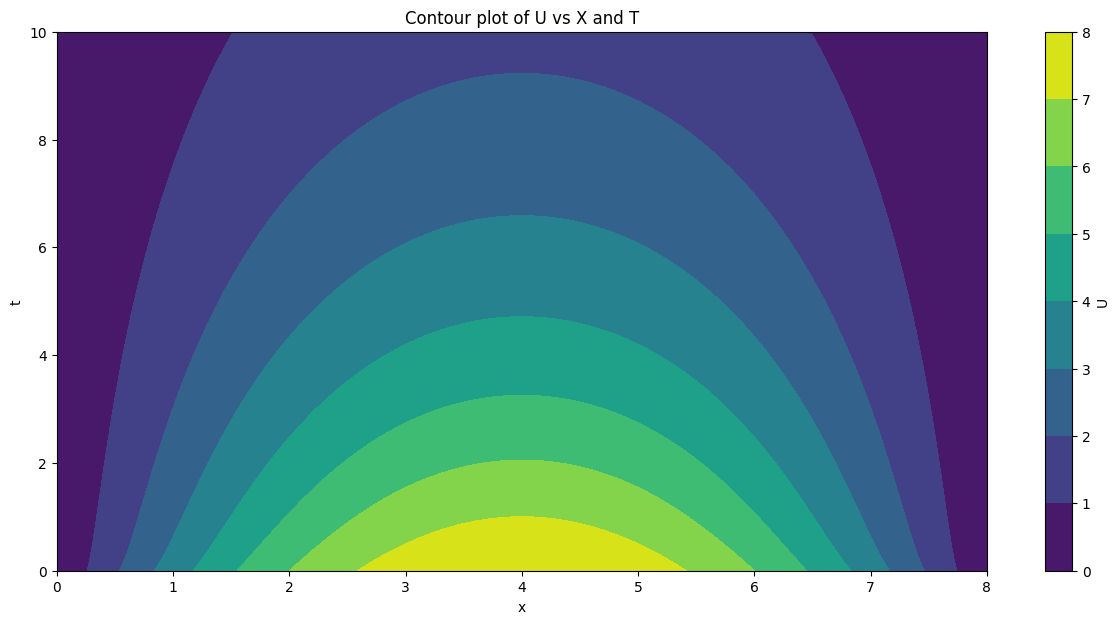

In [8]:
from prettytable import PrettyTable
def g(x):
    return (4*x) - (x**2)/2
'''
Defining the limits and Number of subintervals and other parameters
'''
x0 = 0
xN = 8
Nx = 80
Nt = 5000
T = 10
'''
Calculating the solution using Crank-Nicholson Method
'''
alpha = (T/Nt)/(((xN-x0)/Nx)**2)
print(f"The value of alpha is taken to be = {alpha} \n And for matrix Inversion, the gauss seidel method with 1e-6 tolerence is used.")
X,T,U = crank_nicholson(g, x0, xN, Nx, Nt, T, alpha)
'''
Tabulating the Results
'''
print("The table below shows the solution of the heat equation using Crank-Nicholson Method for few time steps")
table = PrettyTable()
table.field_names = ['X', f"Time step = {T[0]}",f"Time step = {T[1]}",f"Time step = {T[2]}"]
for i in range(len(X)):
    table.add_row([round(X[i],4), round(U[0][i],4), round(U[1][i],4), round(U[2][i],4)])
print(table)
'''
PLotting the contour plots
'''
import matplotlib.pyplot as plt
# Contour plot of T
plt.figure(figsize=(15,7))
plt.contourf(X, T, U, cmap='viridis')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of U vs X and T')
plt.colorbar(label='U')
plt.show()

### Q5




The table below shows the solution of the given Poisson's Equation
+----------+-----+----------+----------+----------+----------+----------+-----------+-----------+
|   x/y    | 0.0 | 0.285714 | 0.571429 | 0.857143 | 1.142857 | 1.428571 |  1.714286 |    2.0    |
+----------+-----+----------+----------+----------+----------+----------+-----------+-----------+
|   0.0    | 0.0 | 0.285714 | 0.571429 | 0.857143 | 1.142857 | 1.428571 |  1.714286 |    2.0    |
| 0.285714 | 0.0 | 1.494913 | 1.921214 | 2.183396 | 2.567358 | 3.224273 |  4.381297 |  2.661424 |
| 0.571429 | 0.0 | 4.027401 | 3.965247 | 4.19005  | 4.788627 | 5.851112 |  7.482581 |  3.54159  |
| 0.857143 | 0.0 | 6.206071 | 5.63972  | 5.713012 | 6.399716 | 7.714321 |  9.691236 |  4.712837 |
| 1.142857 | 0.0 | 7.581472 | 6.550646 | 6.457679 | 7.163496 | 8.623251 | 10.885204 |  6.27143  |
| 1.428571 | 0.0 | 7.753787 | 6.358509 | 6.18372  | 6.880793 | 8.34069  | 10.683077 |  8.345468 |
| 1.714286 | 0.0 | 6.034778 | 4.739375 | 4.763099 |

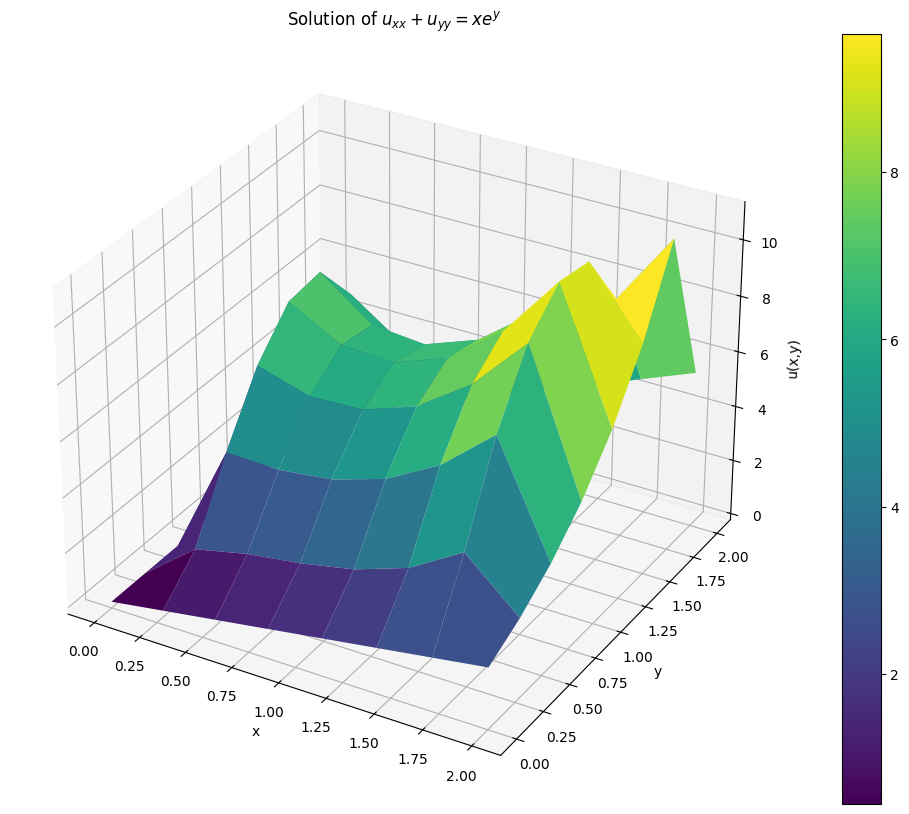

In [6]:
'''
Defining the functions
'''
def rho(x, y): 
    return x * np.exp(y)
def u_iy(y):
    return np.zeros(y.shape)
def u_fy(y):
    return 2 * np.exp(y)
def u_xi(x):
    return x
def u_xf(x):
    return x * np.e
'''
Defining the limits and Number of subintervals and other parameters as per the Question
'''
size = 6
x_i = 0
x_f = 2
y_i = 0
y_f = 2
'''
Tabulating the Results
'''
x, y, u = poisson_laplace(rho, x_i, x_f, y_i, y_f, u_iy, u_fy, u_xi, u_xf,size)
table1 = PrettyTable()
print("The table below shows the solution of the given Poisson's Equation")
table1.field_names = ["x/y"] + [f"{round(x[i],6)}" for i in range(len(x))]
for i in range(len(y)):
    row = [f"{round(y[i],6)}"]
    for j in range(len(x)):
        row.append(f"{round(u[i,j],6)}")
    table1.add_row(row)
print(table1)
'''
plotting the solution
'''
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_title(r"Solution of $u_{xx}+u_{yy} = xe^y$ ")
fig.colorbar(surf)
plt.show()